In [36]:
# !pip install yfinance;

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
apple_stock = yf.download("AAPL",start="2022-01-01", end = "2023-01-01" )

tickers_list = ['AAPL', 'MSFT', 'IBM', 'MTB', 'BA', 'AXP']
stock_data = yf.download(tickers_list,'2015-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  6 of 6 completed


In [4]:
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190948,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904037,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.280991,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449326,86709100


In [5]:
stock_data.tail()

,AAPL,AXP,BA,IBM,MSFT,MTB
Date,,,,,,
2023-09-28,170.690002,150.229996,190.429993,141.580002,313.640015,126.459999
2023-09-29,171.210007,149.190002,191.679993,140.300003,315.750000,126.449997
2023-10-02,173.750000,149.479996,187.830002,140.800003,321.799988,122.099998
2023-10-03,172.399994,145.050003,188.919998,140.389999,313.390015,120.650002
2023-10-04,NaN,NaN,NaN,140.729996,NaN,120.979797


In [6]:
apple_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,153.726055,8.791038e+07
std,13.063034,12.937389,13.108058,13.056081,12.790989,2.365699e+07
min,127.989998,129.949997,125.870003,126.040001,125.504547,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,143.846016,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,152.968781,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,164.569435,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,180.190948,1.826020e+08


In [7]:
#daily returns
apple_stock["Daily_return"] = apple_stock["Adj Close"].pct_change()

In [8]:
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190948,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904037,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.280991,96904000,-0.016694
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449326,86709100,0.000989


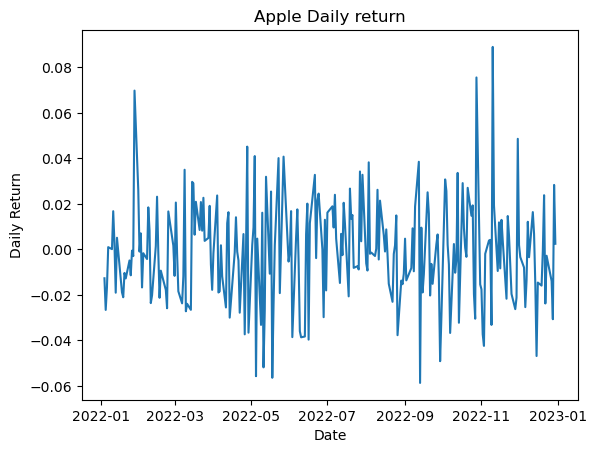

In [9]:
plt.plot(apple_stock["Daily_return"])
plt.title("Apple Daily return")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

In [10]:
# 50 day moving average
apple_stock["50_MA"] = apple_stock["Adj Close"].rolling(window = 50).mean()

In [11]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_return,50_MA
Date,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,-0.013878,143.285240
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547,85438400,-0.030685,142.963928
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700,0.028324,142.687070
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414398


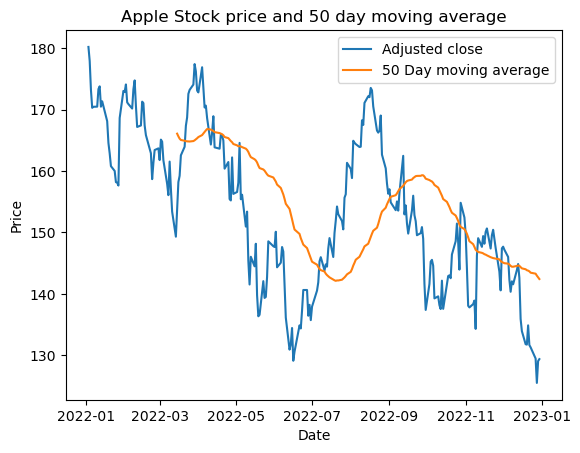

In [12]:
plt.plot(apple_stock["Adj Close"], label = "Adjusted close")
plt.plot(apple_stock["50_MA"], label = "50 Day moving average")
plt.title("Apple Stock price and 50 day moving average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


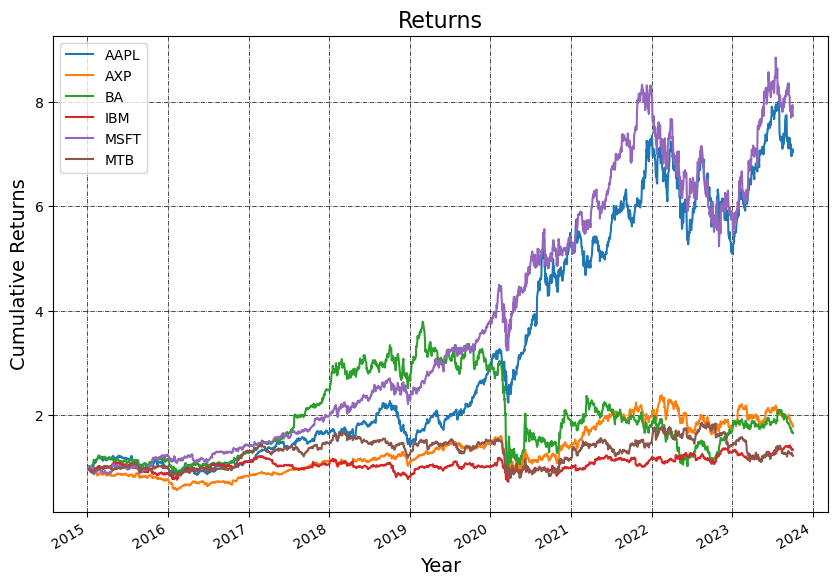

In [13]:

# Plot all the close prices
((stock_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Volatility calculation

In [14]:
volatility = apple_stock["Daily_return"].std()
print(f"Volatility: {volatility}" )

Volatility: 0.022471303064008002


### Sharpe Ratio Calculation

In [15]:
risk_free_rate = .01
annual_return = (apple_stock["Daily_return"].mean()+1) ** 252 -1
annual_volatility = apple_stock["Daily_return"].std() * np.sqrt(252)
sharpe_ratio = (annual_return - risk_free_rate ) / annual_volatility
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: -0.6927818589896485


### Beta

In [16]:
sp500 = yf.download("^GSPC", start = "2022-01-01", end = "2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [17]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [18]:
sp500["Daily_return_sp500"] = sp500["Adj Close"].pct_change()

In [19]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_return_sp500
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050


In [22]:
#join daily returns for apple and sp500
join_data = pd.concat([apple_stock["Daily_return"], sp500["Daily_return_sp500"]], axis = 1).dropna()

In [23]:
join_data.head()

,Daily_return,Daily_return_sp500
Date,,
2022-01-04,-0.012692,-0.000630
2022-01-05,-0.026600,-0.019393
2022-01-06,-0.016694,-0.000964
2022-01-07,0.000989,-0.004050
2022-01-10,0.000116,-0.001441


In [26]:
beta = join_data.cov().iloc[0,1] / join_data["Daily_return_sp500"].var()

In [29]:
print(f"Beta: {beta}")

Beta: 1.3057989085352848


### Bollinger bands

In [30]:
apple_stock["20_MA"] = apple_stock["Adj Close"].rolling(window = 20).mean()

In [31]:
apple_stock["Upper_band"] = apple_stock["20_MA"] + 2 * apple_stock["Adj Close"].rolling(window = 20).std()

In [33]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_return,50_MA,20_MA,Upper_band
Date,,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967,140.063428,151.599918
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,-0.013878,143.285240,139.356941,151.683198
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547,85438400,-0.030685,142.963928,138.603655,152.374461
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700,0.028324,142.687070,137.686568,151.433483
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200,0.002469,142.414398,136.771472,150.149072


In [34]:
apple_stock["Lower_band"] = apple_stock["20_MA"] - 2 * apple_stock["Adj Close"].rolling(window = 20).std()

In [35]:
apple_stock.iloc[20:]

,Open,High,Low,Close,Adj Close,Volume,Daily_return,50_MA,20_MA,Upper_band,Lower_band
Date,,,,,,,,,,,
2022-02-01,174.009995,174.839996,172.309998,174.610001,172.864960,86213900,-0.000973,NaN,167.797587,180.159644,155.435530
2022-02-02,174.750000,175.880005,173.330002,175.839996,174.082611,84914300,0.007044,NaN,167.606516,179.416664,155.796367
2022-02-03,174.479996,176.240005,172.119995,172.899994,171.172028,89418100,-0.016720,NaN,167.506525,179.150978,155.862071
2022-02-04,171.679993,174.100006,170.679993,172.389999,170.884567,82465400,-0.001679,NaN,167.536703,179.214514,155.858893
2022-02-07,172.860001,173.949997,170.949997,171.660004,170.160919,77251200,-0.004235,NaN,167.522283,179.185653,155.858913
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798,143.446967,140.063428,151.599918,128.526938
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,-0.013878,143.285240,139.356941,151.683198,127.030685
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547,85438400,-0.030685,142.963928,138.603655,152.374461,124.832849


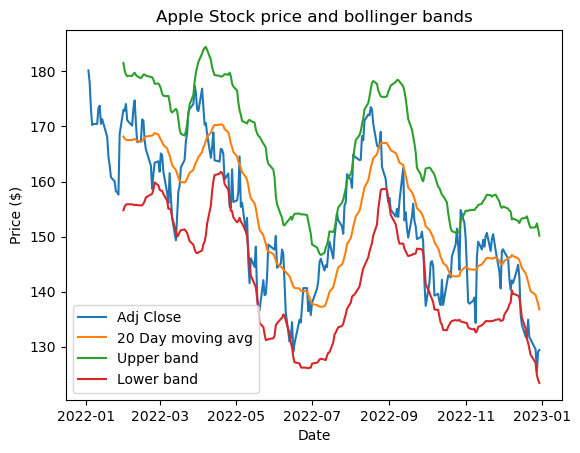

In [39]:
plt.plot(apple_stock["Adj Close"], label = "Adj Close")
plt.plot(apple_stock["20_MA"], label = "20 Day moving avg")
plt.plot(apple_stock["Upper_band"], label = "Upper band")
plt.plot(apple_stock["Lower_band"], label = "Lower band")
plt.title("Apple Stock price and bollinger bands")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()